# Toronto House Price Affordability Analysis
### By:  John Pazzelli
**Nov. 2017**

This analysis was performed as part of an assignment for the [Applied Plotting, Charting and Data Representation in Python](https://www.coursera.org/learn/python-plotting) course as part of the [Applied Data Science in Python Specialization](https://www.coursera.org/specializations/data-science-python) on Coursera.  

The assignment required that we independently find **at least 2 datasets** on the web that are **related in at least one dimension** to answer a question of our choosing related to **economic activity or measures** for the **City of Toronto**.  

### Topic
I decided to perform an **analysis of Toronto housing affordability by neighbourhood** given the runaway prices of housing and condominiums in the city in recent years.

To answer this question, I decided to **compare the average household income by city region to the average house price in that region** to look for areas in the city where the residents are living above their means (i.e. the **average house price far exceeds the average household income**).

I used the following data sources (note that the latest available data was from 2011):

**City of Toronto**:
1. [Wellbeing - Housing data](http://opendata.toronto.ca/social.development/wellbeing/WB-Housing.xlsx) taken from [here](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#0ee5007f-7c8b-5107-7fa8-24de3ae06f22)

2. [National Household Survey Data - 2011](http://opendata.toronto.ca/it/com/Ward%20Profiles%20-%20NHS_2011.xlsx) taken from [here](https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#0dcc4b06-b0e8-3db3-80d0-a10aed2a0312) 

### Challenges
- The **average home price data was listed per neighbourhood** but the **household income data was listed per city ward** and there was **no direct mapping** of city neighbourhood to ward number

- To overcome this, I obtained a [Map of Neighbourhoods](https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/) and a [Map of Wards](https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/ward-profiles/) and [overlayed them in Photoshop](https://github.com/JP-DataScienceProjects/TorontoHousingAffordabilityAnalysis/blob/master/Screenshots/Overlay.png) to **add a Ward number column** to my **average home price data**

- After performing this mapping, the code below is then able to **join the two datasets on the Ward column**

In [13]:
# Import libraries and datasets
from IPython.display import display
import pandas as pd
import numpy as np

df_hprices = pd.read_csv('WB-Housing_trimmed.csv', delimiter='\t')
df_hincome = pd.read_excel('Ward Profiles - NHS_2011_trimmed.xlsx', header=9).T

In [14]:
display(df_hprices.head())
display(df_hincome.head())

,Neighbourhood,Neighbourhood Id,Ward,Avg Home Sale Price
0,West Humber-Clairville,1,2,317508
1,Mount Olive-Silverstone-Jamestown,2,1,251119
2,Thistletown-Beaumond Heights,3,1,414216
3,Rexdale-Kipling,4,2,392271
4,Elms-Old Rexdale,5,2,233832


,Number of Households,Median income,Average income
Toronto,1047875,58381,87038
Ward 1,18145,55027,66001
Ward 2,19080,57718,72100
Ward 3,19610,72175,95259
Ward 4,21105,69501,106513


In [15]:
# Data Cleansing
# Set datatypes and the index column to be the neighbourhood ID
df_hprices.astype({'Ward': int, 'Avg Home Sale Price': int}, inplace=True)
df_hprices.set_index('Neighbourhood Id', inplace=True)

# Remove the Toronto aggregate row
df_hincome.drop('Toronto', inplace=True, axis='index')

# Rename the index values to remove the 'Ward' text
def renameIndex(name):
    return name[5:]

df_hincome.rename(renameIndex, inplace=True, axis='index')

# Alter the index name
df_hincome.index.names = ['Ward']
df_hincome.index = df_hincome.index.astype(int)

In [16]:
# Datasets are now in a format where they can be joined
display(df_hprices.head())
display(df_hincome.head())

,Neighbourhood,Ward,Avg Home Sale Price
Neighbourhood Id,,,
1,West Humber-Clairville,2,317508
2,Mount Olive-Silverstone-Jamestown,1,251119
3,Thistletown-Beaumond Heights,1,414216
4,Rexdale-Kipling,2,392271
5,Elms-Old Rexdale,2,233832


,Number of Households,Median income,Average income
Ward,,,
1,18145,55027,66001
2,19080,57718,72100
3,19610,72175,95259
4,21105,69501,106513
5,27295,75035,110919


In [23]:
# Join the datasets on the Ward ID
df = pd.merge(df_hprices, df_hincome, how='inner', left_on='Ward', right_index=True)

# Add column indicating the affordability of each neighbourhood
df['HousePriceToIncomeRatio'] = df['Avg Home Sale Price'] / df['Average income']

In [25]:
# Display the data and summary statistics to look for any outliers (everything checked out OK)
display(df.head())
df.describe()

,Neighbourhood,Ward,Avg Home Sale Price,Number of Households,Median income,Average income,HousePriceToIncomeRatio
Neighbourhood Id,,,,,,,
1,West Humber-Clairville,2,317508,19080,57718,72100,4.403717
4,Rexdale-Kipling,2,392271,19080,57718,72100,5.440652
5,Elms-Old Rexdale,2,233832,19080,57718,72100,3.243162
6,Kingsview Village-The Westway,2,292861,19080,57718,72100,4.061872
8,Humber Heights-Westmount,2,491396,19080,57718,72100,6.815479


,Ward,Avg Home Sale Price,Number of Households,Median income,Average income,HousePriceToIncomeRatio
count,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000
mean,21.735714,5.481934e+05,24481.428571,60044.485714,87057.021429,6.238526
std,12.034489,2.676674e+05,6455.644268,11060.895787,29080.666844,1.798345
min,1.000000,2.041040e+05,16715.000000,42849.000000,52280.000000,2.308764
25%,12.000000,3.749645e+05,19960.000000,52833.000000,70365.750000,4.987171
50%,22.000000,4.912100e+05,23170.000000,57923.000000,78991.500000,6.146769
75%,31.000000,5.902160e+05,25230.000000,65594.500000,95259.000000,7.075494
max,44.000000,1.849084e+06,45420.000000,94306.000000,202111.000000,12.297023


<IPython.core.display.Javascript object>


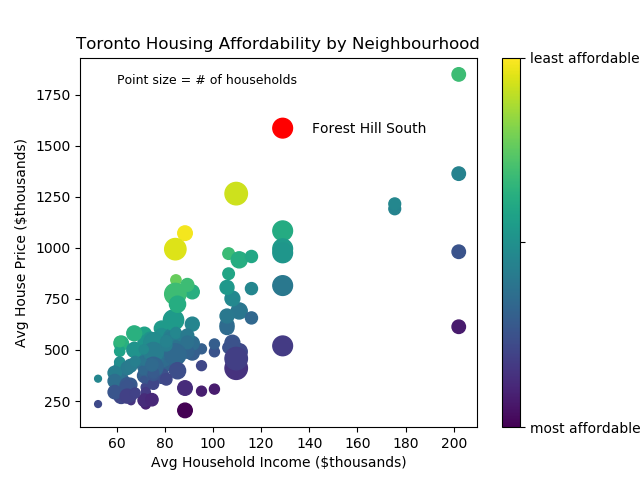

In [28]:
# Create the interactive plot
%matplotlib notebook
import matplotlib.pyplot as plt

# Generate figure
fig = plt.figure()

# Plot the data with labels and annotation
plt.scatter(df['Average income']/1000, df['Avg Home Sale Price']/1000, c=df['HousePriceToIncomeRatio'], s=250*np.log(df['Number of Households']/16000), picker=True)
plt.xlabel('Avg Household Income ($thousands)')
plt.ylabel('Avg House Price ($thousands)')
plt.title('Toronto Housing Affordability by Neighbourhood')
plt.text(60, 1800, 'Point size = # of households', fontsize=9)

# Setup the color bar with custom ticks
mp = plt.colorbar()
mn = df['HousePriceToIncomeRatio'].min()
mx = df['HousePriceToIncomeRatio'].max()
mp.set_ticks([mn, (mx+mn)/2.0, mx])
mp.set_ticklabels(['most affordable', '', 'least affordable'])

# Setup hover display text
lasttext = None
lastcolor = None
lastartist = None
lastind = None

# Define event handler for mouse click
# On click, display the neighbourhood name next to the clicked item
def on_pick(event):
    global lasttext, lastcolor, lastartist, lastind
    
    artist = event.artist
    mouseevent = event.mouseevent
    
    if lasttext: lasttext.set_visible(False)
    lasttext = plt.text(mouseevent.xdata + 10, mouseevent.ydata, '\n'.join(df['Neighbourhood'].iloc[event.ind].values), zorder=10000)
    
    if lastcolor is not None and lastartist is not None and lastind is not None: lastartist._facecolors[lastind,:] = lastcolor
    lastartist = artist
    lastind = event.ind
    lastcolor = artist._facecolors[event.ind,:]
    artist._facecolors[event.ind,:] = (1, 0, 0, 1)
    
    
fig.canvas.mpl_connect('pick_event', on_pick);

In [22]:
# Display summary table
df[['Neighbourhood', 'HousePriceToIncomeRatio', 'Average income', 'Avg Home Sale Price']].sort_values('HousePriceToIncomeRatio', ascending=False)

,Neighbourhood,HousePriceToIncomeRatio,Average income,Avg Home Sale Price
Neighbourhood Id,,,,
101,Forest Hill South,12.297023,128973,1585984
56,Leaside-Bennington,12.124146,88404,1071823
95,Annex,11.773731,84382,993491
98,Rosedale-Moore Park,11.538466,109667,1265389
67,Playter Estates-Danforth,9.956966,84631,842668
79,University,9.171624,84382,773920
80,Palmerston-Little Italy,9.163224,85294,781568
68,North Riverdale,9.157739,89388,818592
41,Bridle Path-Sunnybrook-York Mills,9.148854,202111,1849084
